In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset
import torch.nn.functional as F

import torchvision.transforms as transforms
from sklearn.metrics import r2_score

from tqdm import tqdm, tqdm_notebook 

from modules import *
from utills import *

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data:

In [2]:
batch_size = 1
data = mri_data(transform=transforms.ToTensor())
data = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size, shuffle=True, drop_last=True)

#### Interpolate:

In [3]:
g = unetGen(cond_dim=1).cuda()
g.load_state_dict(torch.load('states/generator'))
g.train(False);

In [4]:
def interpolateADAS(img, generator, source_score, target_score):
    
    generator.train(False)
    
    if not isinstance(img,torch.Tensor):
        img = torch.FloatTensor(img)
        
    while np.ndim(img)!=4:
        img = img[None,...]
        
    y_new = torch.Tensor([target_score])[None,:,None,None]
    y_new = y_new.repeat(1,1,img.size(2),img.size(3))
    
    mask = generator(Variable(img.cuda()), Variable(y_new.cuda()))[0,0,...].cpu().data.numpy()
    
    if target_score > source_score:
        mask = np.clip(mask, -1, 0)
    else:
        mask = np.clip(mask, 0, 1)
        
    orig = img[0,0,...].cpu().numpy()
    img_masked = np.clip(orig + mask, 0, 1)
    
    return img_masked

#### Low ADAS to high ADAS:

 - ##### 1:

In [5]:
#need to choose brain with low ADAS here
idx = 3309#np.random.randint(4800)
X, init_ADAS =data.dataset[idx]
X = X[1,...] #take mean slice
print('Id:', idx)
print('Initial ADAS:', init_ADAS.squeeze())

Id: 3309
Initial ADAS: 4.0


In [6]:
new_ADAS = 40.
interpolated = interpolateADAS(X, g, init_ADAS, new_ADAS)

[ 4.] --> 40.0


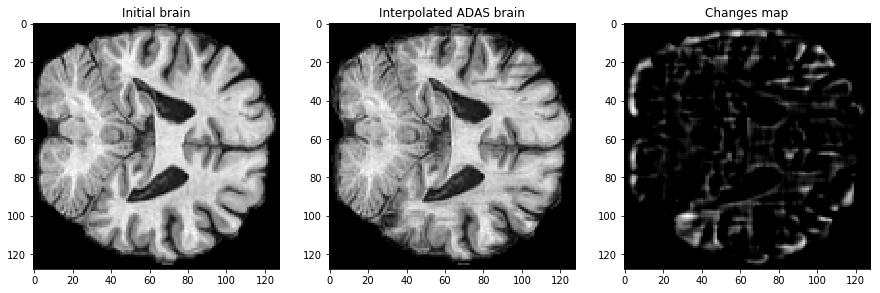

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(X.numpy(), cmap='gray')
ax[0].set_title('Initial brain')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated ADAS brain')
ax[2].imshow(np.abs(X.numpy()-interpolated), cmap='gray')
ax[2].set_title('Changes map')
print(init_ADAS,'-->',new_ADAS)

 - ##### 2:

In [8]:
idx = 3162#np.random.randint(4800)
X, init_ADAS =data.dataset[idx]
X = X[1,...] #take mean slice
print('Id:', idx)
print('Initial ADAS:', init_ADAS.squeeze())

Id: 3162
Initial ADAS: 3.0


In [9]:
new_ADAS = 40.
interpolated = interpolateADAS(X, g, init_ADAS, new_ADAS)

[ 3.] --> 40.0


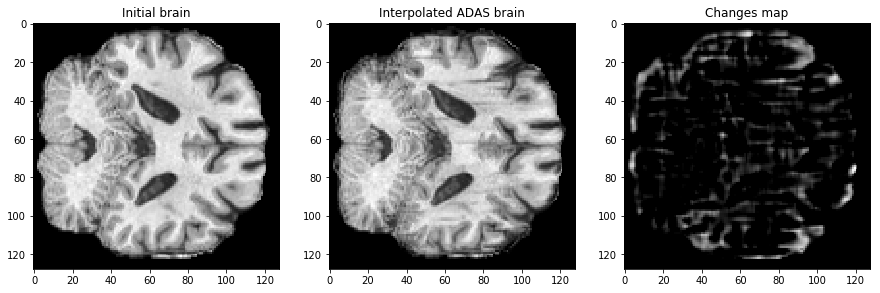

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(X.numpy(), cmap='gray')
ax[0].set_title('Initial brain')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated ADAS brain')
ax[2].imshow(np.abs(X.numpy()-interpolated), cmap='gray')
ax[2].set_title('Changes map')
print(init_ADAS,'-->',new_ADAS)

 - ##### 3:

In [11]:
idx = 4267#np.random.randint(4800)
X, init_ADAS =data.dataset[idx]
X = X[1,...] #take mean slice
print('Id:', idx)
print('Initial ADAS:', init_ADAS.squeeze())

Id: 4267
Initial ADAS: 3.0


In [12]:
new_ADAS = 40.
interpolated = interpolateADAS(X, g, init_ADAS, new_ADAS)

[ 3.] --> 40.0


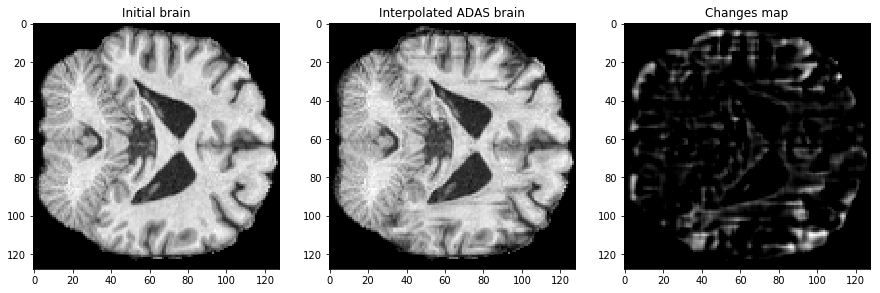

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(X.numpy(), cmap='gray')
ax[0].set_title('Initial brain')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated ADAS brain')
ax[2].imshow(np.abs(X.numpy()-interpolated), cmap='gray')
ax[2].set_title('Changes map')
print(init_ADAS,'-->',new_ADAS)

#### High ADAS to low ADAS:

 - ##### 1:

In [14]:
#need to choose brain with high ADAS here
idx = 3752#np.random.randint(4800)
X, init_ADAS =data.dataset[idx]
X = X[1,...] #take mean slice
print('Id:', idx)
print('Initial ADAS:', init_ADAS.squeeze())

Id: 3752
Initial ADAS: 48.0


In [15]:
new_ADAS = 0.
interpolated = interpolateADAS(X, g, init_ADAS, new_ADAS)

[ 48.] --> 0.0


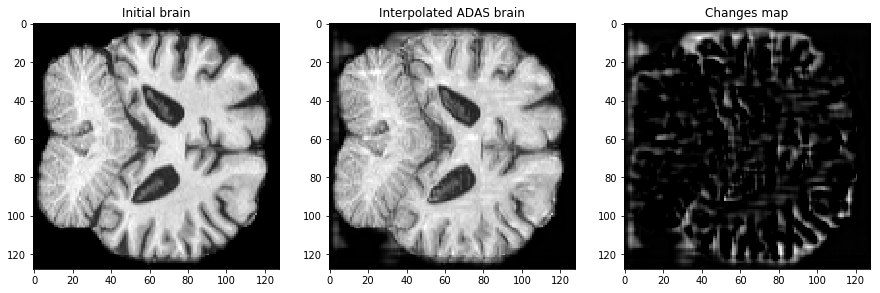

In [16]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(X.numpy(), cmap='gray')
ax[0].set_title('Initial brain')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated ADAS brain')
ax[2].imshow(np.abs(X.numpy()-interpolated), cmap='gray')
ax[2].set_title('Changes map')
print(init_ADAS,'-->',new_ADAS)

 - ##### 2:

In [17]:
idx = 3784#np.random.randint(4800)
X, init_ADAS =data.dataset[idx]
X = X[1,...] #take mean slice
print('Id:', idx)
print('Initial ADAS:', init_ADAS.squeeze())

Id: 3784
Initial ADAS: 37.33000183105469


In [18]:
new_ADAS = 0.
interpolated = interpolateADAS(X, g, init_ADAS, new_ADAS)

[ 37.33000183] --> 0.0


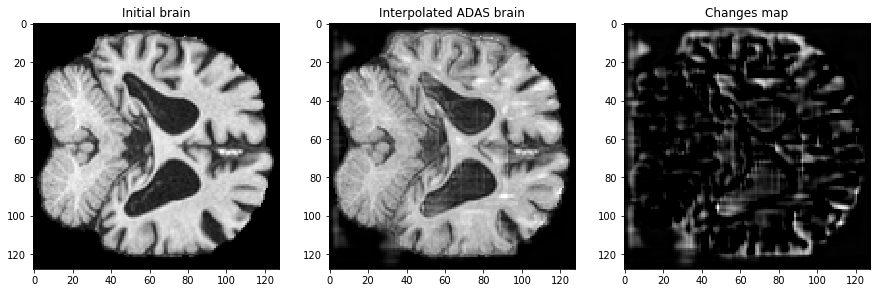

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(X.numpy(), cmap='gray')
ax[0].set_title('Initial brain')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated ADAS brain')
ax[2].imshow(np.abs(X.numpy()-interpolated), cmap='gray')
ax[2].set_title('Changes map')
print(init_ADAS,'-->',new_ADAS)

 - ##### 3:

In [20]:
idx = 3188#np.random.randint(4800)
X, init_ADAS =data.dataset[idx]
X = X[1,...] #take mean slice
print('Id:', idx)
print('Initial ADAS:', init_ADAS.squeeze())

Id: 3188
Initial ADAS: 39.0


In [21]:
new_ADAS = 0.
interpolated = interpolateADAS(X, g, init_ADAS, new_ADAS)

[ 39.] --> 0.0


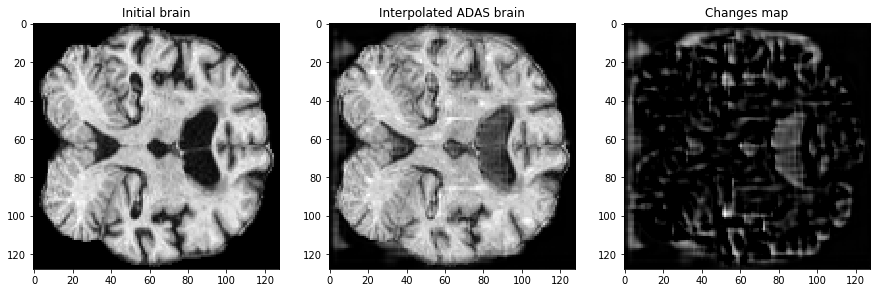

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(X.numpy(), cmap='gray')
ax[0].set_title('Initial brain')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated ADAS brain')
ax[2].imshow(np.abs(X.numpy()-interpolated), cmap='gray')
ax[2].set_title('Changes map')
print(init_ADAS,'-->',new_ADAS)